# <font color='black'>Praticando Estratégias de Limpeza de Dados </font> 



Banco de dados: https://dados.gov.br/dados/conjuntos-dados/registro-de-ocupacao-hospitalar-covid-19

Registro de Ocupação Hospitalar COVID-19 -2022

In [1]:
# Imports
import math
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

### Carregando o Dataset

In [2]:
#Lista para identificar valores ausentes
lista_labels_valores_ausentes = ["n/a", "na", "undefined"]

In [3]:
df = pd.read_csv("LeitoOcupacao_2022.csv", na_values = lista_labels_valores_ausentes)

In [4]:
df.shape

(291891, 26)

In [5]:
df.head()

,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,641508,PBGTlqtFBP,2022-01-17T03:00:00.000Z,2379341,13.0,8.0,0.0,0.0,0.0,1.0,...,parse-cloud,_User$m6WdvZgbBS,Santa Catarina,Mafra,Santa Catarina,Mafra,False,False,2021-02-15T11:08:07.797Z,2022-01-17T21:56:42.351Z
1,1275198,ipPHkH1yIB,2022-01-05T03:00:00.000Z,2594366,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$C2nTBR5lmy,Paraná,Umuarama,Paraná,Umuarama,False,False,2021-12-08T10:42:04.123Z,2022-01-05T14:17:35.799Z
2,1290474,oDyVTndNXc,2022-01-01T03:00:50.682Z,2747871,NaN,NaN,NaN,NaN,1.0,9.0,...,parse-cloud,_User$APEoiAf61c,São Paulo,Ilhabela,São Paulo,Ilhabela,False,False,2022-01-01T03:34:58.234Z,2022-01-01T03:34:58.234Z
3,1290489,cTrwNtInVV,2022-01-01T03:00:08.570Z,2082497,NaN,NaN,NaN,NaN,0.0,1.0,...,parse-cloud,_User$q0FgtTNz2d,São Paulo,Bernardino de Campos,São Paulo,Bernardino de Campos,False,False,2022-01-01T04:50:29.194Z,2022-01-01T04:50:29.194Z
4,1290490,CPkiO32WyI,2022-01-01T03:00:14.691Z,2092980,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$u4yOaQOJlf,São Paulo,Bastos,São Paulo,Bastos,False,False,2022-01-01T05:01:31.468Z,2022-01-01T05:01:31.468Z


### Análise Exploratória

In [6]:
df.isna().sum()

Unnamed: 0                    0
_id                           0
dataNotificacao               0
cnes                          0
ocupacaoSuspeitoCli      291890
ocupacaoSuspeitoUti      291890
ocupacaoConfirmadoCli    291890
ocupacaoConfirmadoUti    291890
ocupacaoCovidUti              0
ocupacaoCovidCli              0
ocupacaoHospitalarUti         0
ocupacaoHospitalarCli         0
saidaSuspeitaObitos           0
saidaSuspeitaAltas            0
saidaConfirmadaObitos         0
saidaConfirmadaAltas          0
origem                        0
_p_usuario                    0
estadoNotificacao             0
municipioNotificacao          0
estado                        0
municipio                     0
excluido                      0
validado                      0
_created_at                   0
_updated_at                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291891 entries, 0 to 291890
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             291891 non-null  int64  
 1   _id                    291891 non-null  object 
 2   dataNotificacao        291891 non-null  object 
 3   cnes                   291891 non-null  object 
 4   ocupacaoSuspeitoCli    1 non-null       float64
 5   ocupacaoSuspeitoUti    1 non-null       float64
 6   ocupacaoConfirmadoCli  1 non-null       float64
 7   ocupacaoConfirmadoUti  1 non-null       float64
 8   ocupacaoCovidUti       291891 non-null  float64
 9   ocupacaoCovidCli       291891 non-null  float64
 10  ocupacaoHospitalarUti  291891 non-null  float64
 11  ocupacaoHospitalarCli  291891 non-null  float64
 12  saidaSuspeitaObitos    291891 non-null  float64
 13  saidaSuspeitaAltas     291891 non-null  float64
 14  saidaConfirmadaObitos  291891 non-nu

Encontrado só 1 (um) dado válido nas colunas 4 à 7 entre 291891 linhas.

In [8]:
df.describe()

,Unnamed: 0,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas
count,2.918910e+05,1.0,1.0,1.0,1.0,291891.000000,291891.000000,291891.000000,291891.000000,291891.000000,291891.000000,291891.000000,291891.000000
mean,1.444834e+06,13.0,8.0,0.0,0.0,2.045681,2.996297,9.272057,39.330244,0.120679,0.536639,0.816986,5.692663
std,8.580388e+04,NaN,NaN,NaN,NaN,7.040290,41.212810,24.810934,78.605385,2.517002,8.935322,14.115997,143.952737
min,6.415080e+05,13.0,8.0,0.0,0.0,-7.000000,-1.000000,-5.000000,-1.000000,-5.000000,-5.000000,-2.000000,-6.000000
25%,1.372384e+06,13.0,8.0,0.0,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.445690e+06,13.0,8.0,0.0,0.0,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000
75%,1.518768e+06,13.0,8.0,0.0,0.0,1.000000,2.000000,10.000000,46.000000,0.000000,0.000000,0.000000,0.000000
max,1.637427e+06,13.0,8.0,0.0,0.0,300.000000,21701.000000,8191.000000,21701.000000,596.000000,3292.000000,3300.000000,9167.000000


In [9]:
#Valores nulos por coluna
df.isna().any()

Unnamed: 0               False
_id                      False
dataNotificacao          False
cnes                     False
ocupacaoSuspeitoCli       True
ocupacaoSuspeitoUti       True
ocupacaoConfirmadoCli     True
ocupacaoConfirmadoUti     True
ocupacaoCovidUti         False
ocupacaoCovidCli         False
ocupacaoHospitalarUti    False
ocupacaoHospitalarCli    False
saidaSuspeitaObitos      False
saidaSuspeitaAltas       False
saidaConfirmadaObitos    False
saidaConfirmadaAltas     False
origem                   False
_p_usuario               False
estadoNotificacao        False
municipioNotificacao     False
estado                   False
municipio                False
excluido                 False
validado                 False
_created_at              False
_updated_at              False
dtype: bool

###  Tratamento de Valores Ausentes

In [10]:
# Verificar percentual de valores ausentes no Dataset
def func_cal_percent_valores_ausentes(df):
    totalCells = np.product(df.shape)
    missingCount = df.isnull().sum()
    totalMissing = missingCount.sum()
    print("O dataset possui", round(((totalMissing/totalCells) *100), 2), "% de valores ausentes")
    
func_cal_percent_valores_ausentes(df)    

O dataset possui 15.38 % de valores ausentes


In [11]:
def func_calc_percentual_valores_ausentes_coluna(df):
    
    # Total de valores ausentes
    mis_val = df.isnull().sum()

    # Porcentagem de valores ausentes
    mis_val_percent = 100 * mis_val / len(df)

    # Tipo de dado das colunas com valores ausentes
    mis_val_dtype = df.dtypes

    # Cria uma tabela com os resultados
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Renomear as colunas
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Valores Ausentes', 1 : '% de Valores Ausentes', 2: 'Dtype'})

    # Classifica a tabela por porcentagem de valores ausentes de forma decrescente e remove colunas sem valores faltantes
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,0] != 0].sort_values('% de Valores Ausentes', ascending = False).round(2)

    # Print 
    print ("O dataset tem " + str(df.shape[1]) + " colunas.\n"
        "Encontrado: " + str(mis_val_table_ren_columns.shape[0]) + " colunas que têm valores ausentes.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # Retorna o dataframe com informações ausentes
    return mis_val_table_ren_columns

In [12]:
df_missing= func_calc_percentual_valores_ausentes_coluna(df)
df_missing

O dataset tem 26 colunas.
Encontrado: 4 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
ocupacaoSuspeitoCli,291890,100.0,float64
ocupacaoSuspeitoUti,291890,100.0,float64
ocupacaoConfirmadoCli,291890,100.0,float64
ocupacaoConfirmadoUti,291890,100.0,float64


In [13]:
# Calcula o percentual de valores ausentes na variável ocupacaoSuspeitoCli para confirmação de ausência de dados
df.ocupacaoSuspeitoCli.isnull().mean()*100

99.9996574063606

In [14]:
# Conferindo o único registro na variável ocupacaoSuspeitoCli
df.ocupacaoSuspeitoCli.value_counts()

13.0    1
Name: ocupacaoSuspeitoCli, dtype: int64

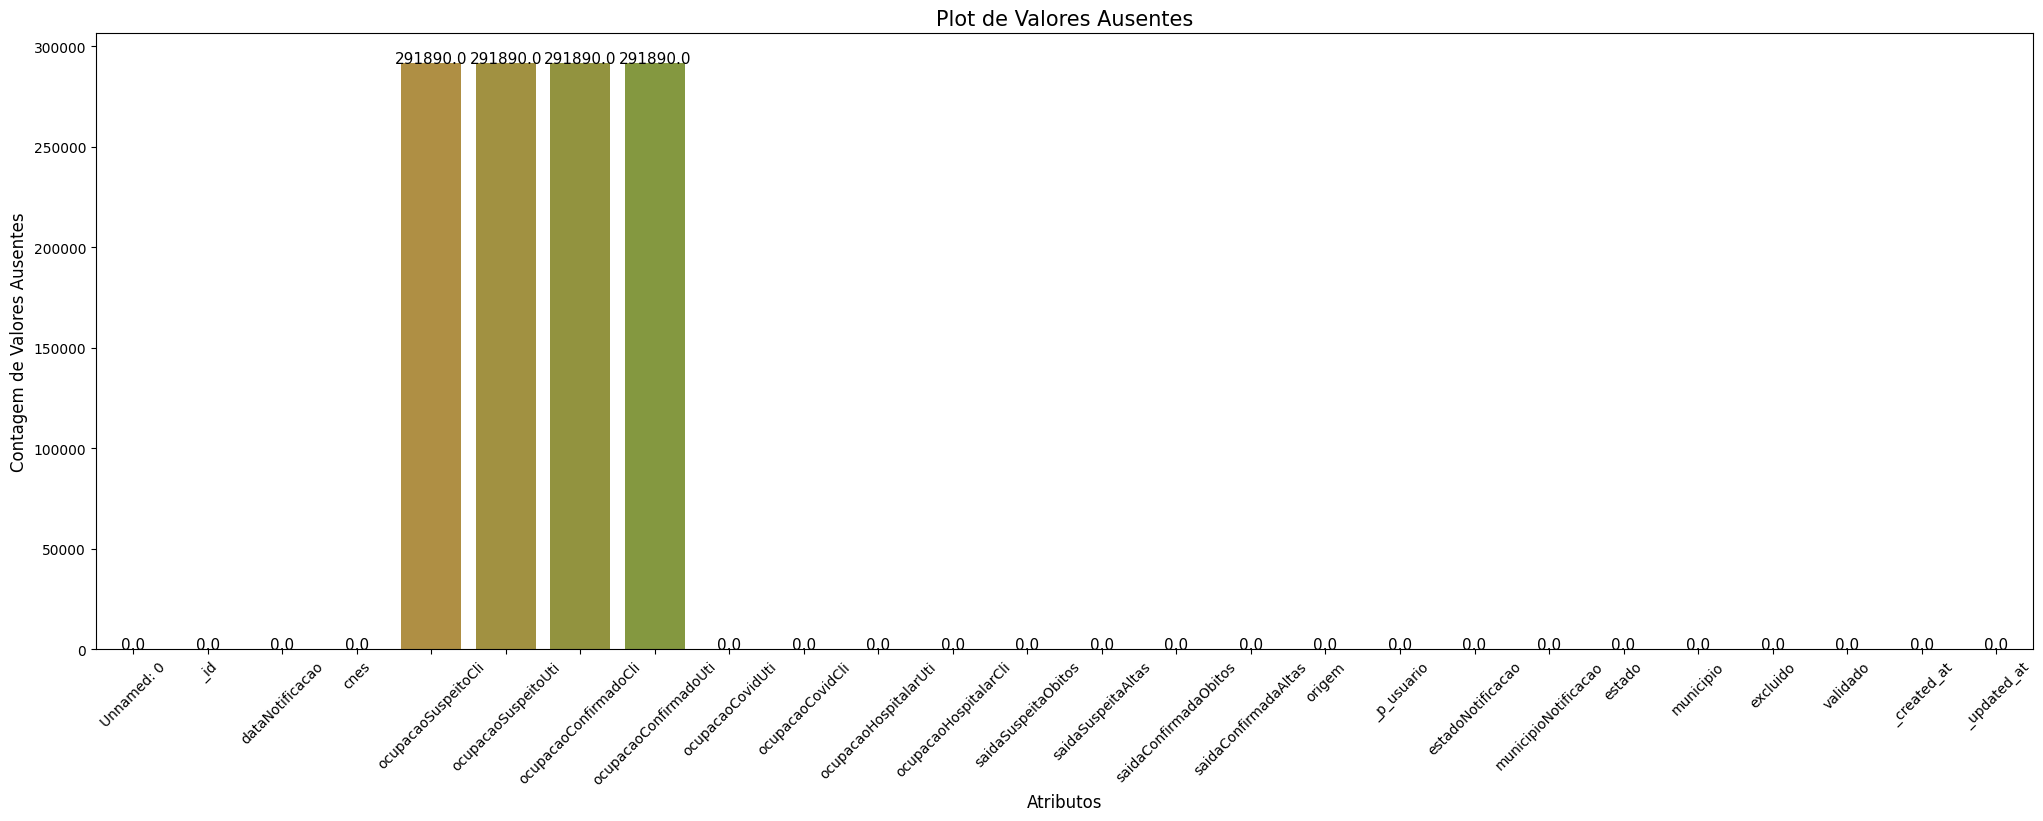

In [15]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (25,8))

# Barplot
ax = sns.barplot(x='index', y=0, data=null_df, palette='husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

In [16]:
# Colunas que serão removidas por terem valores acima de 30% ausentes
col_remov = df_missing[df_missing['% de Valores Ausentes'] >= 30.00].index.tolist()

In [17]:
col_remov

['ocupacaoSuspeitoCli',
 'ocupacaoSuspeitoUti',
 'ocupacaoConfirmadoCli',
 'ocupacaoConfirmadoUti']

In [18]:
# Drop das colunas e criação de outro Dataframe
dataset_clean = df.drop(col_remov, axis = 1)

In [19]:
dataset_clean

,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,641508,PBGTlqtFBP,2022-01-17T03:00:00.000Z,2379341,0.0,1.0,8.0,12.0,0.0,1.0,...,parse-cloud,_User$m6WdvZgbBS,Santa Catarina,Mafra,Santa Catarina,Mafra,False,False,2021-02-15T11:08:07.797Z,2022-01-17T21:56:42.351Z
1,1275198,ipPHkH1yIB,2022-01-05T03:00:00.000Z,2594366,0.0,0.0,9.0,31.0,0.0,0.0,...,parse-cloud,_User$C2nTBR5lmy,Paraná,Umuarama,Paraná,Umuarama,False,False,2021-12-08T10:42:04.123Z,2022-01-05T14:17:35.799Z
2,1290474,oDyVTndNXc,2022-01-01T03:00:50.682Z,2747871,1.0,9.0,3.0,14.0,0.0,0.0,...,parse-cloud,_User$APEoiAf61c,São Paulo,Ilhabela,São Paulo,Ilhabela,False,False,2022-01-01T03:34:58.234Z,2022-01-01T03:34:58.234Z
3,1290489,cTrwNtInVV,2022-01-01T03:00:08.570Z,2082497,0.0,1.0,0.0,3.0,0.0,0.0,...,parse-cloud,_User$q0FgtTNz2d,São Paulo,Bernardino de Campos,São Paulo,Bernardino de Campos,False,False,2022-01-01T04:50:29.194Z,2022-01-01T04:50:29.194Z
4,1290490,CPkiO32WyI,2022-01-01T03:00:14.691Z,2092980,0.0,0.0,0.0,3.0,0.0,0.0,...,parse-cloud,_User$u4yOaQOJlf,São Paulo,Bastos,São Paulo,Bastos,False,False,2022-01-01T05:01:31.468Z,2022-01-01T05:01:31.468Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291886,1635288,vxHRq1yjWd,2022-06-21T03:00:00.000Z,2373513,0.0,0.0,0.0,0.0,0.0,0.0,...,parse-cloud,_User$XjBJBtqkHG,Ceará,Acarape,Ceará,Acarape,False,False,2023-06-22T13:33:50.778Z,2023-06-22T13:33:50.778Z
291887,1635786,HLcYYxK0iH,2022-06-25T03:00:00.000Z,2161575,0.0,0.0,0.0,3.0,0.0,0.0,...,aplicacao-web,_User$lrIXrpQGDr,Minas Gerais,Mercês,Minas Gerais,Mercês,False,False,2023-06-25T12:17:30.285Z,2023-06-26T00:22:13.944Z
291888,1636289,BwXaJgOHrA,2022-06-25T03:00:00.000Z,2117568,0.0,2.0,0.0,24.0,0.0,0.0,...,parse-cloud,_User$K5rViczCwC,Minas Gerais,Entre Rios de Minas,Minas Gerais,Entre Rios de Minas,False,False,2023-06-27T13:24:56.900Z,2023-06-27T13:24:56.900Z
291889,1636615,pOYCFzLHpk,2022-07-28T03:00:00.000Z,2582716,0.0,0.0,5.0,32.0,0.0,0.0,...,parse-cloud,_User$baHBgyM568,Paraná,Medianeira,Paraná,Medianeira,False,False,2023-06-28T17:03:53.572Z,2023-06-28T17:03:53.572Z


In [20]:
dataset_clean.duplicated().sum()

0

In [21]:
func_calc_percentual_valores_ausentes_coluna(dataset_clean)

O dataset tem 22 colunas.
Encontrado: 0 colunas que têm valores ausentes.


Observação: Como as colunas estavam com 100% de valores ausentes (encontrado somente 1 dado válido nas 4 colunas), foi aplicado o Drop e não a imputação pela falta de dados válidos. 

In [22]:
dataset_clean.head()

,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,641508,PBGTlqtFBP,2022-01-17T03:00:00.000Z,2379341,0.0,1.0,8.0,12.0,0.0,1.0,...,parse-cloud,_User$m6WdvZgbBS,Santa Catarina,Mafra,Santa Catarina,Mafra,False,False,2021-02-15T11:08:07.797Z,2022-01-17T21:56:42.351Z
1,1275198,ipPHkH1yIB,2022-01-05T03:00:00.000Z,2594366,0.0,0.0,9.0,31.0,0.0,0.0,...,parse-cloud,_User$C2nTBR5lmy,Paraná,Umuarama,Paraná,Umuarama,False,False,2021-12-08T10:42:04.123Z,2022-01-05T14:17:35.799Z
2,1290474,oDyVTndNXc,2022-01-01T03:00:50.682Z,2747871,1.0,9.0,3.0,14.0,0.0,0.0,...,parse-cloud,_User$APEoiAf61c,São Paulo,Ilhabela,São Paulo,Ilhabela,False,False,2022-01-01T03:34:58.234Z,2022-01-01T03:34:58.234Z
3,1290489,cTrwNtInVV,2022-01-01T03:00:08.570Z,2082497,0.0,1.0,0.0,3.0,0.0,0.0,...,parse-cloud,_User$q0FgtTNz2d,São Paulo,Bernardino de Campos,São Paulo,Bernardino de Campos,False,False,2022-01-01T04:50:29.194Z,2022-01-01T04:50:29.194Z
4,1290490,CPkiO32WyI,2022-01-01T03:00:14.691Z,2092980,0.0,0.0,0.0,3.0,0.0,0.0,...,parse-cloud,_User$u4yOaQOJlf,São Paulo,Bastos,São Paulo,Bastos,False,False,2022-01-01T05:01:31.468Z,2022-01-01T05:01:31.468Z


### Conversão Tipo de Dados

In [23]:
# Converte para datetime
def convert_to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col])

In [24]:
convert_to_datetime(dataset_clean, ['_created_at', '_updated_at', 'dataNotificacao'])

In [25]:
#Confirmando a conversão 
dataset_clean['_created_at'].dtype

datetime64[ns, UTC]

In [26]:
dataset_clean['_updated_at'].dtype

datetime64[ns, UTC]

In [27]:
dataset_clean['dataNotificacao'].dtype

datetime64[ns, UTC]

### Tratamento de Outliers

In [28]:
class TrataOutlier:

    # Construtor
    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def count_outliers(self, Q1, Q3, IQR, columns):
        cut_off = IQR * 1.5
        temp_df = (self.df[columns] < (Q1 - cut_off)) | (self.df[columns] > (Q3 + cut_off))
        return [len(temp_df[temp_df[col] == True]) for col in temp_df]

    def calc_skew(self, columns=None):
        if columns == None:
            columns = self.df.columns
        return [self.df[col].skew() for col in columns]

    def percentage(self, list):
        return [str(round(((value/150001) * 100), 2)) + '%' for value in list]

    def remove_outliers(self, columns):
        for col in columns:
            Q1, Q3 = self.df[col].quantile(0.25), self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            cut_off = IQR * 1.5
            lower, upper = Q1 - cut_off, Q3 + cut_off
            self.df = self.df.drop(self.df[self.df[col] > upper].index)
            self.df = self.df.drop(self.df[self.df[col] < lower].index)

    def replace_outliers_with_fences(self, columns):
        for col in columns:
            Q1, Q3 = self.df[col].quantile(0.25), self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            cut_off = IQR * 1.5
            lower, upper = Q1 - cut_off, Q3 + cut_off

            self.df[col] = np.where(self.df[col] > upper, upper, self.df[col])
            self.df[col] = np.where(self.df[col] < lower, lower, self.df[col])

    def getOverview(self, columns) -> None:
        min = self.df[columns].min()
        Q1 = self.df[columns].quantile(0.25)
        median = self.df[columns].quantile(0.5)
        Q3 = self.df[columns].quantile(0.75)
        max = self.df[columns].max()
        IQR = Q3 - Q1
        skew = self.calc_skew(columns)
        outliers = self.count_outliers(Q1, Q3, IQR, columns)
        cut_off = IQR * 1.5
        lower, upper = Q1 - cut_off, Q3 + cut_off

        new_columns = ['Nome de Coluna', 'Min', 'Q1', 'Median', 'Q3', 'Max', 'IQR', 'Lower fence', 'Upper fence', 'Skew', 'Num_Outliers', 'Percent_Outliers' ]
        
        data = zip([column for column in self.df[columns]], min, Q1, median, Q3, max, IQR, lower, upper, skew, outliers, self.percentage(outliers))

        new_df = pd.DataFrame(data = data, columns = new_columns)
        
        new_df.set_index('Nome de Coluna', inplace = True)
        \
        return new_df.sort_values('Num_Outliers', ascending = False).transpose()

In [29]:
# Criando o objeto para a classe acima
tratar_outliers = TrataOutlier(dataset_clean)

In [30]:
# Lista de colunas do tipo float
lista_col = dataset_clean.select_dtypes('float64').columns.tolist()

In [31]:
lista_col

['ocupacaoCovidUti',
 'ocupacaoCovidCli',
 'ocupacaoHospitalarUti',
 'ocupacaoHospitalarCli',
 'saidaSuspeitaObitos',
 'saidaSuspeitaAltas',
 'saidaConfirmadaObitos',
 'saidaConfirmadaAltas']

In [32]:
# Visão geral dos outliers
tratar_outliers.getOverview(lista_col)

Nome de Coluna,ocupacaoCovidUti,saidaConfirmadaAltas,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaSuspeitaObitos
Min,-7.0,-6.0,-1.0,-5.0,-1.0,-5.0,-2.0,-5.0
Q1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Median,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0
Q3,1.0,0.0,2.0,10.0,46.0,0.0,0.0,0.0
Max,300.0,9167.0,21701.0,8191.0,21701.0,3292.0,3300.0,596.0
IQR,1.0,0.0,2.0,10.0,44.0,0.0,0.0,0.0
Lower fence,-1.5,0.0,-3.0,-15.0,-64.0,0.0,0.0,0.0
Upper fence,2.5,0.0,5.0,25.0,112.0,0.0,0.0,0.0
Skew,11.033433,42.419724,500.091058,136.784545,74.381815,184.607275,65.804989,65.641935
Num_Outliers,51493,39942,38849,35050,29454,26328,18715,7493


In [33]:
# Tratando os outliers de acordo com a regra IQR ( min Q1 -1.5*IQR; max Q3 + 1.5*IQR)
# replace_outliers_with_fences traça os limites aceitáveis 
tratar_outliers.replace_outliers_with_fences(lista_col)

In [34]:
# Visão geral dos outliers
tratar_outliers.getOverview(lista_col)

Nome de Coluna,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas
Min,-1.5,-1.0,-5.0,-1.0,0.0,0.0,0.0,0.0
Q1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Median,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0
Q3,1.0,2.0,10.0,46.0,0.0,0.0,0.0,0.0
Max,2.5,5.0,25.0,112.0,0.0,0.0,0.0,0.0
IQR,1.0,2.0,10.0,44.0,0.0,0.0,0.0,0.0
Lower fence,-1.5,-3.0,-15.0,-64.0,0.0,0.0,0.0,0.0
Upper fence,2.5,5.0,25.0,112.0,0.0,0.0,0.0,0.0
Skew,1.232196,1.194389,1.112398,1.212443,0.0,0.0,0.0,0.0
Num_Outliers,0,0,0,0,0,0,0,0


In [35]:
dataset_clean.shape

(291891, 22)

In [36]:
df.isna().any()

Unnamed: 0               False
_id                      False
dataNotificacao          False
cnes                     False
ocupacaoSuspeitoCli       True
ocupacaoSuspeitoUti       True
ocupacaoConfirmadoCli     True
ocupacaoConfirmadoUti     True
ocupacaoCovidUti         False
ocupacaoCovidCli         False
ocupacaoHospitalarUti    False
ocupacaoHospitalarCli    False
saidaSuspeitaObitos      False
saidaSuspeitaAltas       False
saidaConfirmadaObitos    False
saidaConfirmadaAltas     False
origem                   False
_p_usuario               False
estadoNotificacao        False
municipioNotificacao     False
estado                   False
municipio                False
excluido                 False
validado                 False
_created_at              False
_updated_at              False
dtype: bool

In [37]:
### Salvando os Dados após a limpeza
#dataset_clean.to_csv('Projeto3/dataset_clean.csv')

As estratégias vistas nesse documento foram empregadas e estudadas seguindo o curso de Análise de Dados com Linguagem Python da Data Science Academy. 